In [ ]:
import sys
sys.path.append('..')

# K nearest neighbours

## Learning objectives
- Implement the K nearest neighbour classification algorithm from scratch
- Understand the difference between parametric and non-parametric models

## Intro - the algorithm

K-nearest neighbours is an extremely simple algorithm. 
Simply predict the label for any input to be the average of the K-nearest neighbours.
K is a hyperparameter which is the number of neighbours of which the labels will be averaged between to make a prediction for a given point in feature space.

### What does it mean to be the nearest neighbour?

![](images/knn_data_distances.jpg)

Note theat the neighbourhood of an example in the train set includes itself! 

## What is the model here?

Interestingly, the model is completely defined by the data. There are no model parameters. We call the predictor a non-parametric model in this case. All of the previous models that we have seen have been parametric. The model doesn't need to be fit. We call this kind of model a "lazy predictor".

Let's implement it.

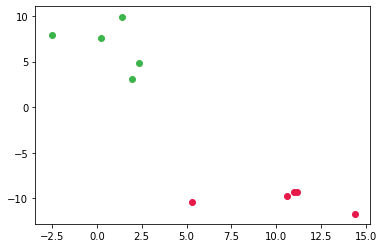

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np
np.set_printoptions(suppress=True)
from utils import get_classification_data, show_data

X, Y = get_classification_data()
show_data(X, Y)


Firstly, let's find the distances between each datapoint in feature space.

For each datapoint we need to calculate it's distance from each other datapoint.
We'll then order these distances and find the k examples which are nearest.

### What distance measure shall we use?
![](images/knn_distance_measures.jpg)

We normally use the Euclidian distance, but we may choose to run the algorithm using different distance metrics.
The distance metric used is a hyperparameter of the algorithm.

In [3]:
def compute_distances(input_X, dataset_X):
    """Takes in an array of inputs and finds each of their distances from every example in a dataset"""
    distances = np.zeros((len(input_X), len(dataset_X)))
    for i, this_x in enumerate(input_X): # for each example in the input
        for j, another_x in enumerate(dataset_X): # for each example in the dataset
            distance = np.linalg.norm(this_x - another_x) ## compute their euclidian distance
            # print(distance)
            distances[i][j] = distance 
    return distances

distances = compute_distances(X, X)
print(distances)
print(distances.shape)

[[ 0.         25.20526404 21.60230144 21.4606058   4.42188235 21.6823912
   2.59233968  6.86107852 20.70056643  5.21295434]
 [25.20526404  0.          3.9686199   4.15644076 25.82919422  4.25711679
  23.94574755 19.29640129  9.15175176 20.41945565]
 [21.60230144  3.9686199   0.          0.19544628 21.98008972  0.67478002
  20.19702949 15.4704004   5.9541823  16.67989482]
 [21.4606058   4.15644076  0.19544628  0.         21.81413279  0.57726183
  20.04206446 15.30817286  5.78578467 16.52668463]
 [ 4.42188235 25.82919422 21.98008972 21.81413279  0.         21.92364342
   2.73062899  6.53973954 19.86887407  5.71789298]
 [21.6823912   4.25711679  0.67478002  0.57726183 21.92364342  0.
  20.20771769 15.44119505  5.33728577 16.7023296 ]
 [ 2.59233968 23.94574755 20.19702949 20.04206446  2.73062899 20.20771769
   0.          4.86104651 18.73322875  3.52638108]
 [ 6.86107852 19.29640129 15.4704004  15.30817286  6.53973954 15.44119505
   4.86104651  0.         13.89996205  1.74286615]
 [20.7005


Note also that K should always be an odd number.
Why?
This is because the discrete classification is the mode of the labels for the K-nearest neighbours, and ties need to be broken if there are an equal number of votes for 2 classes.

Now let's create a model class to perfomr the K-nearest neighbours classification algorithm. For each example passed in, the model should find the K-nearest neighbours and predict the most common label.

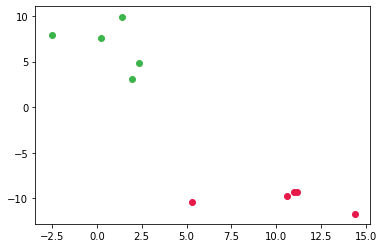

[1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
[1 0 0 0 1 0 1 1 0 1]


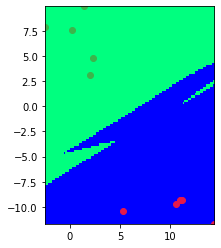

In [7]:
from get_colors import colors
from utils import visualise_predictions
from scipy import stats

class KNN:
    def __init__(self, X, Y, k=3):
        self.k = k
        self.X = X # we have to store the whole dataset in the model!
        self.Y = Y

    def predict(self, input_X):
        """Predict classifications for a vector of inputs"""
        # print(input_X.shape)
        distances = compute_distances(input_X, self.X) ## compute distances between the input and the training data
        predictions = np.zeros(len(input_X)) ## initialise empty array of predictions
        min_indices = np.argsort(distances, axis=1) ## compute array of indices of closest neighbours for each example (hint: what np function would return the indices of the sorted distances)
        # print(min_indices)
        all_k_nearest_indices = min_indices[:, 1: self.k+1] ## get the indices of the k nearest neighbours for each example
        for idx, x in enumerate(input_X): ## for each input example
            k_nearest_indices = all_k_nearest_indices[idx] ## get its K-nearest neighbour indices
            k_nearest = self.X[k_nearest_indices] ## get the k nearest neighbours
            for neighbour in k_nearest: # for each neighbour
                diff = x - neighbour # calculate difference vector
                # print(diff)
                # plt.plot(np.array([x[0], neighbour[0]]) ,np.array([x[1], neighbour[1]]), c=colors[idx], linestyle='dotted') # plot vector between 
            k_nearest_labels = self.Y[k_nearest_indices] ## get labels of k nearest neighbours
            prediction = stats.mode(k_nearest_labels)[0] ## predict the mode of the k-nearest neighbour's labels
            prediction = prediction.astype(int) ## round to represent a valid discrete classification prediction
            predictions[idx] = prediction # populate the empty array of predictions 
        return predictions

    def predict_vis(self, X):
        X = X[0].reshape(1, -1)
        return self.predict(X)

show_data(X, Y)

knn = KNN(X, Y, k=3)

predictions = knn.predict(X)
print(predictions)
print(Y)
# show_data(X, predictions)
visualise_predictions(knn.predict_vis, X, Y, n=100)

## Other methods of voting
### Distance weigted voting
Perhaps we should let examples in our training dataset that are more similar to the example which we want to make a prediction for influence the prediction more. And similarly let far away examples, that may still be within the K nearest neighbours boundary influence the prediction less.
This is called **distance weighted voting**.
A way to implement this would be to weight each example inversely proportionally to the proportion of the labels in the neighbourhood that have that same class label.

Let's implement this.

In [5]:
## implement weighted voting
# the part of the above code that you need to change is where the predictions are made

## What's the best value for K?
Try and play around with the value of K in the code above.

The best K depends on your data.

![](images/knn_radial_k.jpg)

Let's test a bunch of different Ks.
This would be an example of hyparameter search.

Try and vary the data that is being processed.

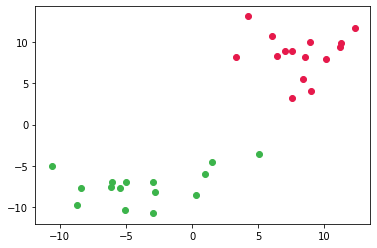

k=0 accuracy=0.0
k=1 accuracy=1.0
k=2 accuracy=1.0
k=3 accuracy=1.0
k=4 accuracy=0.9666666666666667
k=5 accuracy=0.9666666666666667
k=6 accuracy=0.9666666666666667
k=7 accuracy=0.9666666666666667
k=8 accuracy=0.9666666666666667
k=9 accuracy=0.9666666666666667


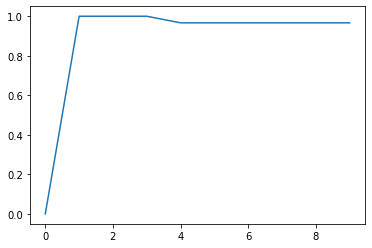

In [22]:
import matplotlib.pyplot as plt

def calc_accuracy(predictions, labels):
    return np.mean(predictions == labels)

X, Y = get_classification_data(sd=3, m=30) # change these params to vary the data
show_data(X, Y)

n_ks = 10
accuracies = np.zeros(n_ks)
for k in range(n_ks):
    knn = KNN(X, Y, k=k)
    predictions = knn.predict(X)
    accuracy = calc_accuracy(predictions, Y)
    accuracies[k] = accuracy
    print(f'k={k} accuracy={accuracy}')

plt.plot(accuracies)
    

## Limitations of K-nearest neighbours

- We need to find the distance between each point and every other point. The time complexity of the algorithm is dominated by this process
- examples that might be close in feature space, may not necessarily be close in label space. 
    - E.g. if examples have similar feature values for features that do not influence the output label, they will be close in feature space, but not in label space. 
    - proximity assumption
- when working with high dimensional data, it will not be easy to visualise the data and hand pick a suitable k.
- when making predictions, we need to store the whole dataset in the model. This can make memory a bottleneck.
- for the best results we should always scale our features to prevent any one with large values disproportionately influencing the prediction. But with KNN this can affect the distances between each example along each dimension of the feature space, resulting in different nearest neighbours. Try with and without feature scaling.
    

## SkLearn implementation

[K-nearest neighbour docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

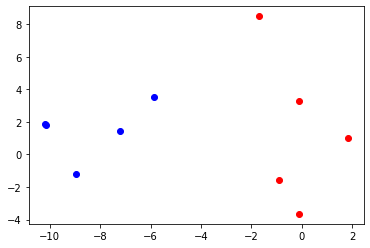

In [61]:
from sklearn.neighbors import KNeighborsClassifier ## get the KNN model from sklearn
k = 3 
knn = KNeighborsClassifier(n_neighbors=k) ## init model with k
knn.fit(X, Y) ## fit model
predictions = knn.predict(X) ## make predictions
show_predictions(X, predictions)

## K-nearest neighbours for regression

K-nearest neighbours can also perform regression as well as classification.

The only differences are:
- labels are not integer class labels, but consist of continuous values
- predictions are not rounded to represent classification labels


## Summary
- The K-nearest neighbours algorithm makes predictions by averaging the labels of the K-nearest neighours in feature space.
- K is the number of neighbours which the algorithm will average the labels of. It is a hyperparameter.

## Challenges
- implement K-nearest neighbours for regression